TERRORISM PREDICTION

Model To Classify the terrorism vulnerability for specific cities/States during a specific Year

Libraries used:

1.   numpy is the fundamental package for scientific computing with Python.
2.   matplotlib is a famous library to plot graphs in Python.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import io

%matplotlib inline

Loading the Tran set data into the notebook

In [3]:
d1 = pd.read_csv('terror_trial2.csv')
print(d1)

      iyear  imonth  country  region  provstate  city   latitude   longitude  \
0      1970       7       58       2         23  1426  18.456792  -69.951164   
1      1970      10      130       1        180   999  19.432608  -99.133207   
2      1970       1      160       5        495  1581  15.478598  120.599741   
3      1970       8       78       8         41   105  37.983773   23.728157   
4      1970       1      217       1        544   924  43.072950  -89.386694   
...     ...     ...      ...     ...        ...   ...        ...         ...   
2843   1979       1      185       8        523  1594  39.470239   -0.376805   
2844   1979       8       69       8        369  1595  50.357113    3.518332   
2845   1979      12      185       8        104  1597  41.652943   -4.728381   
2846   1979       9       45       3        113  1600  10.476920  -73.250490   
2847   1979       2       43       3        526  1604 -33.045632  -71.620529   

      specificity  vicinity  ...  weapt

Splitting the data into required Train and Validation datasets

In [4]:
test = np.zeros((2848,32))
test[:] = d1[:]

split = 2648
df = test[:split,:]
dt = test[split:,:]

In [5]:
train = np.zeros((2648,32))
train[:] = df[:]
print(train)

[[ 1.970e+03  7.000e+00  5.800e+01 ...  0.000e+00  0.000e+00  1.000e+00]
 [ 1.970e+03  1.000e+01  1.300e+02 ...  1.000e+00  1.000e+00  1.000e+00]
 [ 1.970e+03  1.000e+00  1.600e+02 ...  1.000e+00  1.000e+00  0.000e+00]
 ...
 [ 1.979e+03  3.000e+00  9.800e+01 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 1.979e+03  3.000e+00  1.010e+02 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 1.979e+03  4.000e+00  1.390e+02 ...  0.000e+00 -9.000e+00  0.000e+00]]


In [6]:
print('test' + str(test.shape))
print('train'+ str(train.shape))

test(2848, 32)
train(2648, 32)


Separating the 'Criminal' column into a separate dataset as output

In [7]:
Y_test1 = np.zeros((200,1))
Y_test1[:] = test[:200,[31]]
Y_test2 = np.copy(Y_test1.T.astype(int))
print(Y_test2)

[[1 1 0 2 2 0 2 2 3 0 2 0 0 1 0 1 0 1 0 1 0 2 0 0 0 4 2 2 0 0 1 0 0 2 0 2
  0 2 0 1 1 0 0 1 0 1 0 0 0 0 3 1 0 0 0 0 1 0 0 0 3 0 0 0 1 2 1 2 0 0 0 0
  1 0 0 0 2 1 2 3 4 0 2 0 2 1 1 0 1 2 0 0 1 0 1 1 0 0 0 0 0 0 0 0 2 0 0 2
  0 0 1 0 2 0 1 0 0 0 0 2 0 1 0 0 1 2 0 0 0 1 0 0 1 1 2 0 0 3 1 0 0 0 0 0
  0 0 4 2 0 0 0 0 1 3 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 2 0 1 0 1 0 3 4 0 0 0
  0 0 1 0 0 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0]]


In [8]:
Y_test = np.zeros((200,5))
Y_test[np.arange(200),Y_test2]=1
print(Y_test)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0.

In [9]:
Y_train1 = np.zeros((2648,1))
Y_train1[:] = train[:,[31]]
Y_train2 = np.copy(Y_train1.T.astype(int))
print(Y_train2)

[[1 1 0 ... 0 0 0]]


In [10]:
Y_train = np.zeros((2648,5))
Y_train[np.arange(2648),Y_train2]=1
print(Y_train)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [18]:
X_test201 = np.zeros((200,31))
X_train201 = np.zeros((2648,31))
X_test = np.zeros((200,30))
X_train = np.zeros((2648,30))
X_test201 = np.delete(test,31,axis=1)
X_train201 = np.delete(train,31,axis=1)
X_test = np.delete(X_test201,14,axis=1)
X_train = np.delete(X_train201,14,axis=1)

In [19]:
print(X_test)
print("Test:"+ str(X_test.shape))
print(X_train)
print("Train:"+ str(X_train.shape))

[[ 1.970e+03  7.000e+00  5.800e+01 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 1.970e+03  1.000e+01  1.300e+02 ...  1.000e+00  1.000e+00  1.000e+00]
 [ 1.970e+03  1.000e+00  1.600e+02 ... -9.000e+00  1.000e+00  1.000e+00]
 ...
 [ 1.979e+03  1.200e+01  1.850e+02 ... -9.000e+00  0.000e+00 -9.000e+00]
 [ 1.979e+03  9.000e+00  4.500e+01 ... -9.000e+00  0.000e+00 -9.000e+00]
 [ 1.979e+03  2.000e+00  4.300e+01 ... -9.000e+00  0.000e+00 -9.000e+00]]
Test:(2848, 30)
[[ 1.970e+03  7.000e+00  5.800e+01 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 1.970e+03  1.000e+01  1.300e+02 ...  1.000e+00  1.000e+00  1.000e+00]
 [ 1.970e+03  1.000e+00  1.600e+02 ... -9.000e+00  1.000e+00  1.000e+00]
 ...
 [ 1.979e+03  3.000e+00  9.800e+01 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 1.979e+03  3.000e+00  1.010e+02 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 1.979e+03  4.000e+00  1.390e+02 ... -9.000e+00  0.000e+00 -9.000e+00]]
Train:(2648, 30)


In [20]:
X_train_final = np.zeros((30,2648))
X_test_final = np.zeros((30,200))
Y_train_final = np.zeros((5,2648))
Y_test_final = np.zeros((5,200))
X_train_final = np.transpose(X_train)
X_test_final = np.transpose(X_test)
Y_train_final = np.transpose(Y_train)
Y_test_final = np.transpose(Y_test)

In [21]:
print(X_train_final[:][:])

[[ 1.970e+03  1.970e+03  1.970e+03 ...  1.979e+03  1.979e+03  1.979e+03]
 [ 7.000e+00  1.000e+01  1.000e+00 ...  3.000e+00  3.000e+00  4.000e+00]
 [ 5.800e+01  1.300e+02  1.600e+02 ...  9.800e+01  1.010e+02  1.390e+02]
 ...
 [ 0.000e+00  1.000e+00 -9.000e+00 ...  0.000e+00  0.000e+00 -9.000e+00]
 [ 0.000e+00  1.000e+00  1.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  1.000e+00  1.000e+00 ...  0.000e+00  0.000e+00 -9.000e+00]]


Normalising the training and Validation data

In [22]:
mtr = X_train_final.shape[1]
print(mtr)
utr = np.sum(X_train_final,axis=1,keepdims=True)/mtr
print(utr)

2648
[[ 1.97592069e+03]
 [ 5.70845921e+00]
 [ 2.20056269e+02]
 [ 5.98187311e+00]
 [ 2.84942976e+02]
 [ 8.11057402e+02]
 [ 3.21335141e+01]
 [-1.74915467e+01]
 [ 1.09176737e+00]
 [ 1.05740181e-02]
 [ 9.95090634e-01]
 [ 9.89803625e-01]
 [ 9.01057402e-01]
 [ 9.11253776e-01]
 [ 3.27832326e+00]
 [ 6.87688822e+00]
 [ 3.82647281e+01]
 [ 1.59175227e+02]
 [ 2.24841012e+02]
 [ 6.41993958e-03]
 [ 1.76435045e+00]
 [ 6.65105740e+00]
 [ 1.45203927e+00]
 [ 1.69259819e+00]
 [ 5.42296073e-01]
 [-1.62386707e-01]
 [-3.25566465e+00]
 [-3.20128399e+00]
 [ 3.38746224e-01]
 [-1.91238671e+00]]


In [ ]:
train_set_x = X_train_final - utr
test_set_x = X_test_final - utr

In [ ]:
norm = (np.sum(np.square(train_set_x),axis=1,keepdims=True))/mtr
train_set_x = train_set_x / norm
test_set_x = test_set_x / norm

In [ ]:
print(train_set_x)
print("train:"+ str(train_set_x.shape))
print(test_set_x)
print("Test:"+ str(test_set_x.shape))

[[-0.7988649  -0.7988649  -0.7988649  ...  0.41548312  0.41548312
   0.41548312]
 [ 0.10546789  0.35044945 -0.38449523 ... -0.22117419 -0.22117419
  -0.13951367]
 [-0.00495663 -0.00275445 -0.00183687 ... -0.00373319 -0.00364143
  -0.00247917]
 ...
 [ 0.15690676  0.20592046 -0.2842165  ...  0.15690676  0.15690676
  -0.2842165 ]
 [-0.85989993  1.67857835  1.67857835 ... -0.85989993 -0.85989993
  -0.85989993]
 [ 0.10455967  0.15923464  0.15923464 ...  0.10455967  0.10455967
  -0.387515  ]]
train:(30, 2648)
[[-7.98864900e-01 -7.98864900e-01 -7.98864900e-01 ...  4.15483122e-01
   4.15483122e-01  4.15483122e-01]
 [ 1.05467892e-01  3.50449451e-01 -3.84495227e-01 ...  5.13770491e-01
   2.68788931e-01 -3.02834707e-01]
 [-4.95662549e-03 -2.75444573e-03 -1.83687083e-03 ... -1.07222508e-03
  -5.35424128e-03 -5.41541294e-03]
 ...
 [ 1.56906760e-01  2.05920456e-01 -2.84216504e-01 ... -2.84216504e-01
  -2.84216504e-01 -2.84216504e-01]
 [-8.59899929e-01  1.67857835e+00  1.67857835e+00 ... -8.59899929e

Activation Functions

Defininhg Sigmoid activation function

In [ ]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [ ]:
def sigmoiderivative(Z):
  f = Z * (1-Z)
  return f

Function for tanh activation

In [ ]:
def tanh(z):
    s = (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
    return s

derivative of tanh activation

In [ ]:
def tanhderivative(x):
    p = 1 - np.square(x)
    return p

function for RELU activation

In [ ]:
def relu(z):
    s = np.maximum(0,z)
    return s

derivative of RELU activation

In [ ]:
def reluderivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x)
    return np.exp(x) / np.sum(e_x,axis=0)

In [ ]:
def finalrnd(z):
  z[z>0]=1
  return z

Core functions

Initialising the weights and bais

In [ ]:
def initialize(layer):
    
    l = len(layer)
    parameters = {}
    np.random.seed(0)
    for i in range(1,l-1):
      parameters["W"+str(i)]=np.random.randn(layer[i],layer[i-1]) * np.sqrt(2/layer[i-1]) 
      parameters["b"+str(i)]=np.zeros((layer[i],1))
    
    parameters["W"+str(l-1)]=np.random.randn(layer[l-1],layer[l-2]) * 0.001
    parameters["b"+str(l-1)]=np.zeros((layer[l-1],1)) 
   
    
    return parameters

Initialising parameters for ADAM Optimiser

In [ ]:
def initialize_adam(parameters,layer) :
    L = len(parameters) // 2
    v = {}
    s = {}
   
    for l in range(L-1):
   
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
    
    return v, s

Breaking the training dataset with random minibatches

In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 512):
    
               
    m = X.shape[1]                  
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((5,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
      
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        
        mini_batch_X = shuffled_X[:, num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches*mini_batch_size:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

FORWARD PROPAGATION

In [ ]:
def fwd_propagation(X,parameters,layer):
  
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
   
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=sigmoid(forward["Z"+str(l-1)])
  
  return forward

FORWARD-PROPAGATION with DROPOUTS

In [ ]:
def fwd_propagation_drop(X,parameters,layer,keep_prob):
  drop = {}
  l = len(layer)
  forward = {}
  
  forward["Z"+str(1)]=np.dot(parameters["W"+str(1)],X)+parameters["b"+str(1)]
    
  forward["A"+str(1)]=relu(forward["Z"+str(1)])
  drop["d"+str(1)]=(np.random.rand(forward["A"+str(1)].shape[0],forward["A"+str(1)].shape[1])) < keep_prob[1]
    
  forward["A"+str(1)] = np.multiply(forward["A"+str(1)],drop["d"+str(1)])
  forward["A"+str(1)] = forward["A"+str(1)] / keep_prob[1]
  
  for i in range(2,l-1):
    forward["Z"+str(i)]=np.dot(parameters["W"+str(i)],forward["A"+str(i-1)])+parameters["b"+str(i)]
    
    forward["A"+str(i)]=relu(forward["Z"+str(i)])
    drop["d"+str(i)]=(np.random.rand(forward["A"+str(i)].shape[0],forward["A"+str(i)].shape[1])) < keep_prob[i]
    
    forward["A"+str(i)] = np.multiply(forward["A"+str(i)],drop["d"+str(i)])
    forward["A"+str(i)] = forward["A"+str(i)] / keep_prob[i]
    
  forward["Z"+str(l-1)]=np.dot(parameters["W"+str(l-1)],forward["A"+str(l-2)])+parameters["b"+str(l-1)]
  forward["A"+str(l-1)]=softmax(forward["Z"+str(l-1)])
  
  return forward

BACK_PROPATION WITH L2 Regularization

In [ ]:
def back_prop(X,Y,forward,layer,parameters,lambd=0.6):
  m = X.shape[1]
  l = len(layer)
  grads = {}
  
  grads["dz"+str(l-1)]= forward["A"+str(l-1)] - Y
  grads["dw"+str(l-1)]=(np.dot(grads["dz"+str(l-1)],forward["A"+str(l-2)].T) / m) + ((lambd/m)*parameters["W"+str(l-1)])
  grads["db"+str(l-1)]=np.sum(grads["dz"+str(l-1)],axis=1,keepdims=True) / m 
  grads["da"+str(l-2)]=np.dot(parameters["W"+str(l-1)].T,grads["dz"+str(l-1)])
  
  for i in range(l-2,1,-1):
    grads["dz"+str(i)]=grads["da"+str(i)]*reluderivative(forward["A"+str(i)])
    grads["dw"+str(i)]=(np.dot(grads["dz"+str(i)],forward["A"+str(i-1)].T) / m) + ((lambd/m)*parameters["W"+str(i)])
    grads["db"+str(i)]=np.sum(grads["dz"+str(i)],axis=1,keepdims=True)/m
    grads["da"+str(i-1)]=np.dot(parameters["W"+str(i)].T,grads["dz"+str(i)])
  
  grads["dz"+str(1)]=grads["da"+str(1)]*reluderivative(forward["A"+str(1)])
  grads["dw"+str(1)]=np.dot(grads["dz"+str(1)],X.T)/m + ((lambd/m)*parameters["W"+str(1)])

  grads["db"+str(1)]=np.sum(grads["dz"+str(1)],axis=1,keepdims=True)/m
    
  return grads

function to update the weights and Bais

In [ ]:
def optimise(parameters,grads,layer,learning_rate=0.01):
  l= len(layer)
  
  for i in range(1,l):
    parameters["W"+str(i)]=parameters["W"+str(i)] - (learning_rate * grads["dw"+str(i)])
    parameters["b"+str(i)]=parameters["b"+str(i)] - (learning_rate * grads["db"+str(i)])
  
  return parameters

Updating parameters with ADAM optimizer

In [ ]:
def update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    
    for l in range(L-1):
       
        v["dW" + str(l+1)] = beta1 * v['dW' + str(l+1)] + (1-beta1) * grads['dw' + str(l+1)]
        v["db" + str(l+1)] = beta1 * v['db' + str(l+1)] + (1-beta1) * grads['db' + str(l+1)]
       
        v_corrected["dw" + str(l+1)] = v['dW' + str(l+1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l+1)] = v['db' + str(l+1)] / (1 - np.power(beta1, t))
       

        s["dW" + str(l+1)] = beta2 * s['dW' + str(l+1)] + (1-beta2) * np.power(grads['dw' + str(l+1)], 2)
        s["db" + str(l+1)] = beta2 * s['db' + str(l+1)] + (1-beta2) * np.power(grads['db' + str(l+1)], 2)
        
        s_corrected["dw" + str(l+1)] = s['dW' + str(l+1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l+1)] = s['db' + str(l+1)] / (1 - np.power(beta2, t))
       
        parameters["W" + str(l+1)] = parameters['W' + str(l+1)] - learning_rate * v_corrected['dw' + str(l+1)] / np.sqrt(s_corrected['dw' + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters['b' + str(l+1)] - learning_rate * v_corrected['db' + str(l+1)] / np.sqrt(s_corrected['db' + str(l+1)] + epsilon)
       
    return parameters, v, s

function to predict result

In [ ]:
def predict(X,parameters,layers):
  l= len(layer)
  fwd = fwd_propagation(X,parameters,layers)
  
  Y1 = fwd["A"+str(l-1)]
  Y2=np.argmax(Y1,axis=0)
  
  return Y2

Function to retieve total cost for an epoch

In [ ]:
def calculate_cost(Y,forward,parameters,layer,lambd=0.6):
  l= len(layer)
  m=Y.shape[1]
  cost = (-1 * np.sum((Y * np.log(forward["A"+str(l-1)])) + (1 - Y) * np.log(1 - forward["A"+str(l-1)])) / m) + ((lambd/(2*m))*np.sum(np.square(parameters["W"+str(l-1)])))
  return cost

Final model with all functions merged

In [ ]:
def model(X_train,Y_train, X_test, Y_test, layer, keep_prob,mini_batch_size=512, beta1=0.0, beta2=0.0, learning_rate=0.001, iterations = 1500, lambd=0.6):
  costs = []
  
  parameters = initialize(layer)
  v, s = initialize_adam(parameters,layer)
  t = 0
  
  for j in range(iterations):
  
    minibatches = random_mini_batches(X_train,Y_train,mini_batch_size)
    
    for minibatch in minibatches:
      (minibatch_x,minibatch_y) = minibatch
      
      forward = fwd_propagation_drop(minibatch_x,parameters,layer,keep_prob)
      
      cost = calculate_cost(minibatch_y,forward,parameters,layer,lambd)
      grads = back_prop(minibatch_x,minibatch_y,forward,layer,parameters,lambd)
      t=t+1
      parameters,v,s = update_parameters_with_adam(parameters, grads, layer, v, s, t, learning_rate,beta1, beta2)
    
    
    if j % 10 == 0:
      costs.append(cost)
    
    if j%50 == 0:
      print ("Cost after iteration %i: %f" %(j , cost))
    #if j == 100:
      #par = parameters[:]
      
  Y_prediction_train = predict(X_train,parameters,layer)
  Y_prediction_test = predict(X_test,parameters,layer).reshape(2848,1)

  abb = np.mean(np.abs(Y_prediction_train - Y_train2)) * 100
  abc = np.mean(np.abs(Y_prediction_test - Y_test2)) * 100
  print("train accuracy: {} %".format(100 - abb))
  print("test accuracy: {} %".format(100 - abc))
  
  return parameters, grads, forward, costs, Y_prediction_test, Y_prediction_train

Training of model

In [ ]:
layer = [30,20,15,6,5]
keep_prob = [1.0,1.0,1.0,1.0,1.0]
para,grd,ford,cst,test,train1 = model(train_set_x, Y_train_final, test_set_x, Y_test_final, layer, keep_prob, mini_batch_size=128, beta1=0.9, beta2=0.99, learning_rate = 0.01, iterations = 10000, lambd = 0.0 ) 

Cost after iteration 0: 2.500498
Cost after iteration 50: 1.453705
Cost after iteration 100: 1.634691
Cost after iteration 150: 1.472942
Cost after iteration 200: 1.674691
Cost after iteration 250: 1.364789
Cost after iteration 300: 1.370228
Cost after iteration 350: 1.679481
Cost after iteration 400: 1.548668
Cost after iteration 450: 1.511343
Cost after iteration 500: 1.499296
Cost after iteration 550: 1.292576
Cost after iteration 600: 1.409925
Cost after iteration 650: 1.200225
Cost after iteration 700: 1.400083
Cost after iteration 750: 1.250456
Cost after iteration 800: 1.319553
Cost after iteration 850: 1.318838
Cost after iteration 900: 1.351077
Cost after iteration 950: 1.137932
Cost after iteration 1000: 1.587874
Cost after iteration 1050: 1.483438
Cost after iteration 1100: 1.538617
Cost after iteration 1150: 1.269690
Cost after iteration 1200: 1.600468
Cost after iteration 1250: 1.387167
Cost after iteration 1300: 1.128285
Cost after iteration 1350: 1.164017
Cost after iter

<ipython-input-113-76a6b540c185>:4: RuntimeWarning: divide by zero encountered in log
  cost = (-1 * np.sum((Y * np.log(forward["A"+str(l-1)])) + (1 - Y) * np.log(1 - forward["A"+str(l-1)])) / m) + ((lambd/(2*m))*np.sum(np.square(parameters["W"+str(l-1)])))
<ipython-input-113-76a6b540c185>:4: RuntimeWarning: invalid value encountered in multiply
  cost = (-1 * np.sum((Y * np.log(forward["A"+str(l-1)])) + (1 - Y) * np.log(1 - forward["A"+str(l-1)])) / m) + ((lambd/(2*m))*np.sum(np.square(parameters["W"+str(l-1)])))


Cost after iteration 2950: 1.225075
Cost after iteration 3000: 1.144223
Cost after iteration 3050: 1.247745
Cost after iteration 3100: 1.366523
Cost after iteration 3150: 1.163863
Cost after iteration 3200: 1.400886
Cost after iteration 3250: 1.273478
Cost after iteration 3300: 1.373701
Cost after iteration 3350: 1.176299
Cost after iteration 3400: 1.284825
Cost after iteration 3450: 1.178988
Cost after iteration 3500: 0.989427
Cost after iteration 3550: 1.216416
Cost after iteration 3600: 1.246639
Cost after iteration 3650: 1.000760
Cost after iteration 3700: 1.253373
Cost after iteration 3750: 1.257805
Cost after iteration 3800: 1.188023
Cost after iteration 3850: 0.954746
Cost after iteration 3900: 1.283193
Cost after iteration 3950: 1.279971
Cost after iteration 4000: 1.058071
Cost after iteration 4050: 0.988711
Cost after iteration 4100: 1.361338
Cost after iteration 4150: 0.955123
Cost after iteration 4200: 1.258213
Cost after iteration 4250: 1.281868
Cost after iteration 4300: 1

In [ ]:
ghz = np.argmax(test, axis = 0)
print(test)

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


Finding the accuracy for correct predictions for the training set and validation set

In [ ]:
#for test set
exam = np.zeros((1,200))
exam1 = np.zeros((1,200))
exam2 = np.zeros((1,200))
exam3 = np.zeros((1,200))
exam = train1 - Y_train2
exam1 = test - Y_test2
exam1[exam1!=0]=1
exam[exam!=0]=1

fp_train = np.sum(exam)
fp_test = np.sum(exam1)

corr_train = 2648-fp_train
corr_test = 200-fp_test
accu_train = (corr_train/2648)*100
accu_test = (corr_test/200)*100

print("tp for train= "+ str(corr_train))
print("tp for test= "+ str(corr_test))
print("Training Set Accuracy = "+ str(accu_train)+"%")
print("Test Set Accuracy = "+ str(accu_test)+"%")

tp for train= 2039
tp for test= -259688
Training Set Accuracy = 77.00151057401813%
Test Set Accuracy = -129844.0%


In [ ]:
print(para)

{'W1': array([[ 9.22522033e+00,  1.47604147e+01, -1.69037469e+01,
         1.09293687e+01,  4.65134935e+01, -4.39164739e+00,
         2.54821413e+00,  2.50271247e+01, -3.28721364e+00,
        -2.28883966e+00,  2.68182785e+00,  3.02097940e+00,
         1.49990222e+00, -1.47466895e+00,  1.80917427e+00,
         1.45953820e+01,  2.31339039e+01,  4.00605034e+01,
         2.25122709e+01, -2.86540552e+00, -8.14397209e+00,
         3.91392287e+00, -2.99236625e+01, -3.26041924e+01,
        -1.46021489e+01, -5.05933558e+00, -6.16399467e+00,
        -8.92114219e+00, -1.28541349e+00,  1.58911173e+01],
       [-6.54366338e+00, -1.21440450e+01, -2.49526498e+01,
         2.85247431e+00,  7.06742192e+01,  4.87185650e+00,
        -3.86078997e+01,  5.66643851e+01,  1.59109939e+00,
        -1.73627987e-01,  1.10952797e-01, -1.60699543e+00,
        -2.34637947e+00,  2.00619807e+00,  3.19851875e+00,
         1.71823341e+01,  7.83693454e+00, -1.12621133e+02,
         1.27103156e+01, -2.61175172e-01,  3.043

Downloading The Trained Weights

In [ ]:
import csv
from google.colab import files
f1 = open('W1.csv', 'w')
with f1:
  writer = csv.writer(f1)
  writer.writerows(para['W1'])
files.download('W1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
f1 = open('testy.csv', 'w')
with f1:
  writer = csv.writer(f1)
  writer.writerows(Y_test_final)
files.download('testy.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Wei8 = open("actualterrorweights.txt", 'r')
weights123 = Wei8.read()
Wei8.close()

In [ ]:
print(weights123)

{'W1': array([[ 6.93769195e+00,  1.34626172e+01, -2.12175735e+00,
         8.01185634e+00,  3.60311423e+01, -3.22694351e+01,
         7.86489883e+00,  2.45230329e+01, -2.93826836e+00,
        -2.28754636e+00,  2.68053451e+00,  3.01968609e+00,
         2.50160505e+00, -1.37313634e+00,  9.77625089e+00,
         8.49713867e+00,  4.25827359e+01, -8.76351202e+00,
         2.15815946e+01, -2.86411219e+00, -5.01063242e+00,
        -2.47627327e-01, -4.66979022e+01, -3.17469961e+01,
        -1.47455095e+01, -4.63633331e+00,  1.11243210e+00,
        -4.10961835e+00, -3.44718078e-01,  1.30665598e+01],
       [-6.37789432e+00, -9.41365796e+00, -1.14674999e+01,
         2.61927084e+00,  6.96977765e+01,  1.02839554e+01,
        -2.72456768e+01,  6.51763565e+01,  9.55252690e-01,
        -2.04815864e-01,  1.57322450e-01, -1.37200713e+00,
        -2.15859799e+00,  1.91379291e+00, -1.69141952e-01,
         1.63910500e+01,  1.24977305e+01, -7.74273809e+01,
         3.89879176e+01,  7.60636317e-01,  3.087

Graph for the cost of the training set

Cost Graph Results when trained Without ADAMs Oprimization

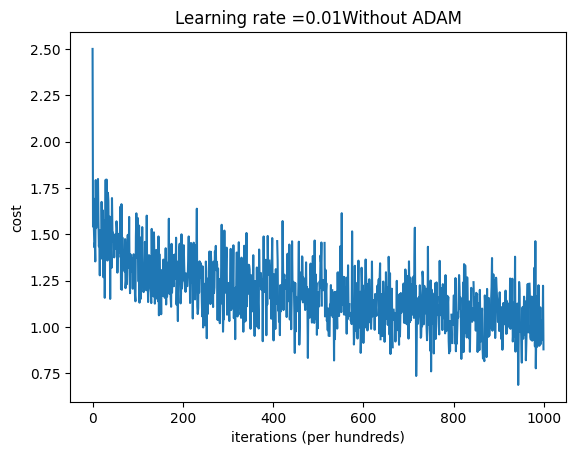

In [ ]:
costs = np.squeeze(cst)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.01)+"Without ADAM")
plt.show()

Cost Graph Results when Used with ADAms Optimization

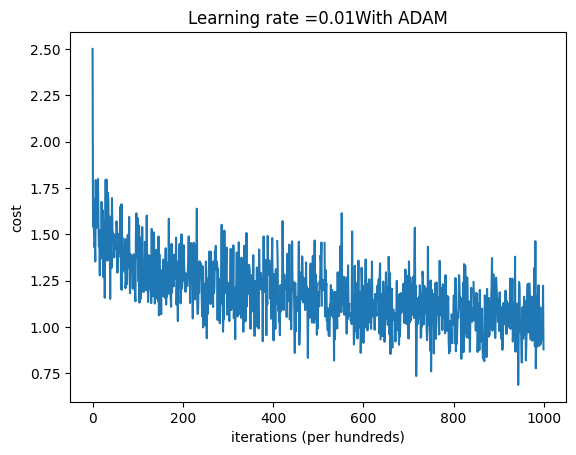

In [ ]:
costs = np.squeeze(cst)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(0.01)+"With ADAM")
plt.show()

END OF TRAINING